In [1]:
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

### 年夏普比率

In [512]:
#夏普比函数(固定窗口)
def sharpe(df):
    avg_return=df['涨跌幅'].mean()
    sd_return=df['涨跌幅'].std()
    sharpe=avg_return / sd_return
    year_sharpe=sharpe * np.sqrt(242)
    return  year_sharpe

In [514]:
#查询三只股票近一年夏普比
end_date=datetime.now().strftime("%Y%m%d")
start_date = (datetime.now()- timedelta(days=364)).strftime("%Y%m%d")
codes=["002594","300750","601012"]
sharpes=pd.DataFrame(columns=['股票代码','年夏普比']) 

In [516]:
for code in codes:
    daily_df = ak.stock_zh_a_hist(code , period="daily", start_date=start_date, end_date=end_date, adjust="") 
    sharpes_new=pd.DataFrame([[code,sharpe(daily_df)]],columns=['股票代码','年夏普比']) 
    sharpes=pd.concat([sharpes,sharpes_new],ignore_index=True)    
print("每只股票年夏普对比：")
print(sharpes)    

C:\Users\ryo\AppData\Local\Temp\ipykernel_84336\3223353624.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sharpes=pd.concat([sharpes,sharpes_new],ignore_index=True)


每只股票年夏普对比：
     股票代码      年夏普比
0  002594  1.600398
1  300750  0.700647
2  601012 -0.401069


### 滚动夏普比

In [2]:
#滚动年夏普比
def roll_sharpe(df,window):
    roll_return=df['涨跌幅'].rolling(window).mean()
    roll_vol =df['涨跌幅'].rolling(window).std() 
    roll_sharpe=roll_return/roll_vol * np.sqrt(242)
    return  roll_sharpe

In [5]:
#把三只股票的滚动夏普并列查看近1年数据
codes=["002594","300750","601012"]
all_sharpes=pd.DataFrame()
for code in codes:
    df=ak.stock_zh_a_hist(code,period="daily", adjust="") 
    df.set_index('日期', inplace=True)
    sharpe_Series=roll_sharpe(df,242).tail(242)
    all_sharpes[code] = sharpe_Series

In [7]:
all_sharpes.head()

,002594,300750,601012
日期,,,
2024-04-25,-0.419494,-0.941382,-1.556049
2024-04-26,-0.335189,-0.187030,-1.606001
2024-04-29,-0.416928,-0.107482,-1.526892
2024-04-30,-0.421124,-0.200619,-1.553384
2024-05-06,-0.245630,-0.073433,-1.448038


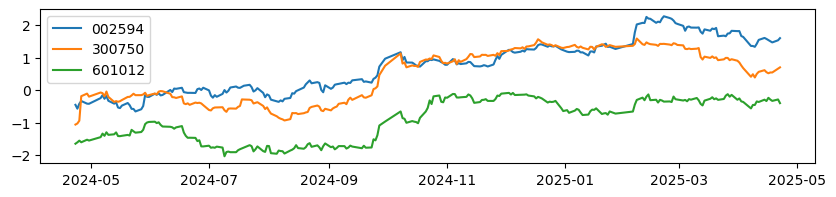

In [502]:
#可视化
for x in all_sharpes.columns:
    plt.plot(all_sharpes.index,all_sharpes[x],label=x) 
plt.rcParams["figure.figsize"] = [7.00, 2.0] 
plt.legend()  
plt.show()  

### 可视化三只股票收盘走势

In [467]:
df0=ak.stock_zh_a_hist("300750", period="daily", adjust="")
df0.sample()

,日期,股票代码,开盘,收盘,最高,最低,成交量,成交额,振幅,涨跌幅,涨跌额,换手率
319,2019-09-27,300750,71.45,71.46,71.89,71.06,71437,510484480.0,1.16,0.01,0.01,0.59


In [13]:
#把三只股票的收盘价并列查看
end_date=datetime.now().strftime("%Y%m%d")
start_date = (datetime.now()- timedelta(days=364)).strftime("%Y%m%d")
codes=["002594","300750","601012"]
all_price=pd.DataFrame()
for code in codes:
    df=ak.stock_zh_a_hist(code, start_date=start_date, end_date=end_date, period="daily", adjust="") 
    df.set_index('日期', inplace=True)
    price_series=df["收盘"]
    all_price[code] = price_series      
all_price.head(5)


,002594,300750,601012
日期,,,
2024-04-25,208.94,193.20,18.27
2024-04-26,219.37,198.48,18.62
2024-04-29,221.38,209.63,19.00
2024-04-30,218.50,202.60,18.20
2024-05-06,226.30,206.98,18.51


In [508]:
#标准化收盘价方便比较
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(all_price)
aps_df=pd.DataFrame(scaler.transform(all_price) ,columns=all_price.columns,index=all_price.index)
aps_df.head(5)

,002594,300750,601012
日期,,,
2024-04-23,-1.614865,-0.998711,1.290475
2024-04-24,-1.565096,-1.007842,1.150902
2024-04-25,-1.533310,-0.908236,1.036253
2024-04-26,-1.315202,-0.762147,1.210719
2024-04-29,-1.273170,-0.453646,1.400140


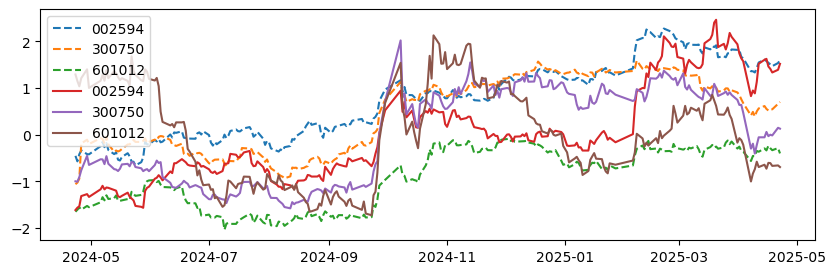

In [487]:
#可视化
for x in all_sharpes.columns:
    plt.plot(all_sharpes.index,all_sharpes[x],label=x,linestyle="--")
for x2 in aps_df.columns:
     plt.plot(aps_df.index,aps_df[x2],label=x2)     
plt.rcParams["figure.figsize"] = [10, 2] 
plt.legend()  
plt.show()  